In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

In [2]:
%matplotlib inline

In [3]:
matplotlib.rcParams.update({'font.size': 12})  # размер шрифта на графиках

<H3> Загрузка данных

In [4]:
DATASET_PATH_1 = './priem.csv'


df_priem = pd.read_csv(DATASET_PATH_1, encoding = "cp1251", sep=';')
df_priem = df_priem.drop(columns=['Причина увольнения по результатам собеседования',
                     'Описание причины увольнения', 'Дата следующего приема', 'Количество дней между увольнением и приемом'])

Загрузка данных по судам, город, ДР

In [5]:
DATASET_PATH_syda = './syda.csv'
DATASET_PATH_age = './age.csv'
DATASET_PATH_city = './city2.csv'
DATASET_PATH_dolgnost = './dolgnost.csv'
DATASET_PATH_prichina_uvol = './prichina_uvol.csv'

df_age = pd.read_csv(DATASET_PATH_age, encoding = "cp1251", sep=';')
df_syda = pd.read_csv(DATASET_PATH_syda, encoding = "cp1251", sep=';')
df_city = pd.read_csv(DATASET_PATH_city, encoding = "cp1251", sep=';')
df_dolgnost = pd.read_csv(DATASET_PATH_dolgnost, encoding = "cp1251", sep=';')
df_prichina_uvol = pd.read_csv(DATASET_PATH_prichina_uvol, encoding = "cp1251", sep=';')

In [6]:
df_priem.head(3)

,№ в группе,Физическое лицо,Дата приема,Дата увольнения,Подразделение,Подразделение первого уровня,Должность,Причина увольнения,Пол
0,304,Малявин Андрей Владимирович,27.01.2010,21.02.2010,ТРФ_Озерск ТР,05. Управление логистики и проектного офиса,Второй механик,(НЕ ИСПОЛЬЗОВАТЬ) По собственному желанию А,мужской
1,305,Быков Евгений Юрьевич,06.01.2010,08.03.2010,ЮМРФ_Залив Восток ПЗ,03. Управление промысла (добычи),Матрос-обработчик,(НЕ ИСПОЛЬЗОВАТЬ) По собственному желанию А,мужской
2,306,Лаптев Сергей Михайлович,27.01.2010,01.04.2010,ТРФ_Озерск ТР,05. Управление логистики и проектного офиса,Электромеханик,(НЕ ИСПОЛЬЗОВАТЬ) По собственному желанию А,мужской


In [7]:
df_priem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14789 entries, 0 to 14788
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   № в группе                    14789 non-null  int64 
 1   Физическое лицо               14789 non-null  object
 2   Дата приема                   14789 non-null  object
 3   Дата увольнения               14443 non-null  object
 4   Подразделение                 14789 non-null  object
 5   Подразделение первого уровня  14789 non-null  object
 6   Должность                     14789 non-null  object
 7   Причина увольнения            13925 non-null  object
 8   Пол                           14789 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [8]:
df_priem.shape

(14789, 9)

In [9]:
df_age.head(3)

,ФИО,Дата рождения,Возраст,Unnamed: 3
0,Абдурахманов Камиль Акбарович,17.04.1974,47,NaN
1,Алексеева Нина Васильевна,02.03.1954,67,NaN
2,Андреев Олег Александрович,29.11.1957,63,NaN


In [10]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7452 entries, 0 to 7451
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ФИО            7452 non-null   object 
 1   Дата рождения  7395 non-null   object 
 2   Возраст        7452 non-null   int64  
 3   Unnamed: 3     0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 233.0+ KB


In [11]:
df_syda

,Название судна,Тип судна
0,ТРФ_Гармония ТР,траспортное
1,ТРФ_Комсомолия Калининграда ТР,траспортное
2,ТРФ_Озерск ТР,траспортное
3,ТРФ_Прогресс ТР,траспортное
4,ТРФ_Симфония ТР,траспортное
5,ЮМРФ_Всеволод Сибирцев КРКПБ,плавбаза
6,ЮМРФ_Залив Восток ПЗ,плавбаза
7,ЮМРФ_Капитан Ефремов ПЗ,плавбаза
8,НМ_Дмитрий Шевченко СТР,добывающее судно
9,НМ_Калиновка СТР,добывающее судно


In [12]:
df_city.head(3)

,ФИО,ФО,столица субъекта
0,Абдурахманов Камиль Акбарович,NaN,NaN
1,Алексеева Нина Васильевна,ДВФО,город
2,Андреев Олег Александрович,ДВФО,населенный пункт


In [13]:
df_dolgnost.head(3)

,Должность,Тип
0,Аппаратчик стерилизации консервов 1 класса,Производство
1,Боцман,Судовая команда
2,Бригадир,Производство


In [14]:
df_prichina_uvol.head(3)

,Причина увольнения,Вид
0,(НЕ ИСПОЛЬЗОВАТЬ) По собственному желанию А,активная
1,"Истечение срока трудового договора, п2 ч1 ст77",нейтральная
2,"Невыход на работу (прогул, отказ от работы)",пассивная


In [15]:
df_city = df_city.drop(df_city[(df_city["ФИО"].isna())].index)

<H3> Обработаем данные для удобства работы

Перекодируем переменные в дату

In [16]:
df_priem['Дата приема'] = pd.to_datetime(df_priem['Дата приема'])
df_priem['Дата приема'] = df_priem['Дата приема'].dt.strftime('%d/%m/%Y')
df_priem['Дата приема'] = pd.to_datetime(df_priem['Дата приема'])

df_priem['Дата увольнения'] = pd.to_datetime(df_priem['Дата увольнения'])
df_priem['Дата увольнения'] = df_priem['Дата увольнения'].dt.strftime('%d/%m/%Y')
df_priem['Дата увольнения'] = pd.to_datetime(df_priem['Дата увольнения'])

In [17]:
df_priem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14789 entries, 0 to 14788
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   № в группе                    14789 non-null  int64         
 1   Физическое лицо               14789 non-null  object        
 2   Дата приема                   14789 non-null  datetime64[ns]
 3   Дата увольнения               14443 non-null  datetime64[ns]
 4   Подразделение                 14789 non-null  object        
 5   Подразделение первого уровня  14789 non-null  object        
 6   Должность                     14789 non-null  object        
 7   Причина увольнения            13925 non-null  object        
 8   Пол                           14789 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 1.0+ MB


In [18]:
df_priem[df_priem['Физическое лицо'].str.match('Храмец')]

,№ в группе,Физическое лицо,Дата приема,Дата увольнения,Подразделение,Подразделение первого уровня,Должность,Причина увольнения,Пол
9194,7898,Храмец Андрей Владимирович,2017-07-25,2018-01-31,ТРФ_Симфония ТР,05. Управление логистики и проектного офиса,Матрос 1 класса,"Истечение срока трудового договора, п2 ч1 ст77",мужской
10453,8852,Храмец Андрей Владимирович,2018-07-17,2018-10-03,ТРФ_Симфония ТР,05. Управление логистики и проектного офиса,Матрос 1 класса,Личные/семейные причины,мужской
11179,9389,Храмец Андрей Владимирович,2019-02-08,2019-03-05,НМ_Калиновск СТР,03. Управление промысла (добычи),Матрос 1 класса,Не выдержал темпа работы,мужской


Посчитаем количество дней между Датой увольнения и Датой следующего приема

In [19]:
df_priem = df_priem.sort_values(['Физическое лицо', 'Дата приема'])
df_priem['Дни между ПиУ'] = ''
df_priem['Дни между ПиУ'] = (df_priem['Дата приема'] - df_priem['Дата увольнения'].shift(1)).dt.days

#df.loc[df['Физическое лицо'] == df['Физическое лицо'].shift(1)]
df_priem.loc[df_priem['Физическое лицо'] != df_priem['Физическое лицо'].shift(1), 'Дни между ПиУ'] = 0

In [20]:
df_priem[df_priem['Физическое лицо'].str.match('Храмец')]

,№ в группе,Физическое лицо,Дата приема,Дата увольнения,Подразделение,Подразделение первого уровня,Должность,Причина увольнения,Пол,Дни между ПиУ
9194,7898,Храмец Андрей Владимирович,2017-07-25,2018-01-31,ТРФ_Симфония ТР,05. Управление логистики и проектного офиса,Матрос 1 класса,"Истечение срока трудового договора, п2 ч1 ст77",мужской,0.0
10453,8852,Храмец Андрей Владимирович,2018-07-17,2018-10-03,ТРФ_Симфония ТР,05. Управление логистики и проектного офиса,Матрос 1 класса,Личные/семейные причины,мужской,167.0
11179,9389,Храмец Андрей Владимирович,2019-02-08,2019-03-05,НМ_Калиновск СТР,03. Управление промысла (добычи),Матрос 1 класса,Не выдержал темпа работы,мужской,128.0


<H3> Создаем таблицу, которая будет содержать уникальные данные по каждой персоне

In [21]:
df_target = df_priem.drop_duplicates('Физическое лицо')
df_target = df_target.drop(columns=['Подразделение первого уровня', 'Дата приема', 'Дата увольнения', '№ в группе', 'Дни между ПиУ'])
df_target.head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Пол
3309,!Дубль! Крюков Павел Валерьевич,ЮМРФ_Залив Восток ПЗ,Матрос 1 класса,Личные/семейные причины,мужской
13381,Ёркина Виктория Александровна,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",женский
8180,АЛИ ИМРОН,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",мужской


Найдем дату первого приема на работу, дату послженего приема на работу, дату полседнего увольнения и медиану дней между увольнениями и приемом на работу

In [22]:
df_target = df_target.merge(df_priem.groupby('Физическое лицо')['Дата приема'].agg(['min']), left_on='Физическое лицо', right_on=df_priem.groupby('Физическое лицо')['Дата приема'].agg(['min']).index)
df_target = df_target.merge(df_priem.groupby('Физическое лицо')['Дата приема'].agg(['max']), left_on='Физическое лицо', right_on=df_priem.groupby('Физическое лицо')['Дата приема'].agg(['max']).index)
df_target = df_target.merge(df_priem.groupby('Физическое лицо')['Дата увольнения'].agg(['max']), left_on='Физическое лицо', right_on=df_priem.groupby('Физическое лицо')['Дата увольнения'].agg(['max']).index)
df_target = df_target.merge(df_priem.groupby('Физическое лицо')['Дни между ПиУ'].agg(['median']), left_on='Физическое лицо', right_on=df_priem.groupby('Физическое лицо')['Дни между ПиУ'].agg(['median']).index)

Переименуем все столбцы, для удобства работы

In [23]:
df_target = df_target.rename(columns={'min': 'Первая дата приема', 'max_x': 'Последняя дата приема', 'max_y': 'Последняя дата увольнения', 'median': 'Медиана между приемами'})

In [24]:
df_target.head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Пол,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами
0,!Дубль! Крюков Павел Валерьевич,ЮМРФ_Залив Восток ПЗ,Матрос 1 класса,Личные/семейные причины,мужской,2014-03-17,2014-03-17,2014-04-29,0.0
1,Ёркина Виктория Александровна,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",женский,2020-03-27,2020-03-27,2020-09-10,0.0
2,АЛИ ИМРОН,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2016-05-30,2016-05-30,2017-04-17,0.0


проверим наполняемость дат

In [25]:
df_target.loc[(df_target['Последняя дата увольнения'].isnull())].head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Пол,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами
253,Анисин Максим Анатольевич,ЮМРФ_Капитан Ефремов ПЗ,Машинист рыбомучной установки,NaN,мужской,2020-06-08,2020-06-08,NaT,0.0
283,Антонова Файруза Ниазовна,НМ_Дмитрий Шевченко СТР,Повар 1 категории,NaN,женский,2018-05-05,2018-05-05,NaT,0.0
291,Ануфриев Вадим Дмитриевич,ЮМРФ_Капитан Ефремов ПЗ,Электрик судовой 1 класса,NaN,мужской,2019-01-22,2019-01-22,NaT,0.0


In [26]:
df_target.loc[(df_target['Последняя дата увольнения'].isnull()), 
              'Последняя дата увольнения'] = df_target['Последняя дата приема']
df_target.loc[(df_target['Последняя дата увольнения'].isnull())]

,Физическое лицо,Подразделение,Должность,Причина увольнения,Пол,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами


Посчитаем количество дней между последним увольнением и приемом на работу. Назовем переменную "Длительность последнего рейса"

In [27]:
df_target['Длительность последнего рейса'] = 0 
df_target['Длительность последнего рейса'] = (df_target['Последняя дата увольнения'] - df_target['Последняя дата приема']).dt.days
df_target.head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Пол,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса
0,!Дубль! Крюков Павел Валерьевич,ЮМРФ_Залив Восток ПЗ,Матрос 1 класса,Личные/семейные причины,мужской,2014-03-17,2014-03-17,2014-04-29,0.0,43
1,Ёркина Виктория Александровна,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",женский,2020-03-27,2020-03-27,2020-09-10,0.0,167
2,АЛИ ИМРОН,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2016-05-30,2016-05-30,2017-04-17,0.0,322


Найдем количество рейсов, выполненных персоной

In [28]:
df_priem['Физическое лицо'].value_counts().sort_index().values
df_target = df_target.sort_values('Физическое лицо')
df_target['Кол-во рейсов'] = df_priem['Физическое лицо'].value_counts().sort_index().values

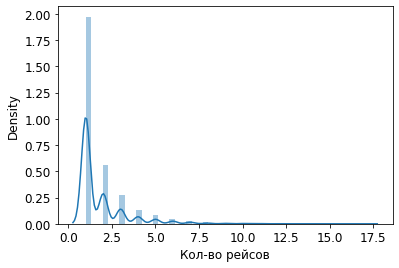

In [29]:
sns_plot = sns.distplot(df_target['Кол-во рейсов'])
fig = sns_plot.get_figure()

In [30]:
df_target['Кол-во рейсов'].value_counts()

1     5163
2     1455
3      709
4      340
5      217
6      127
7       75
8       33
9       20
10      14
11       9
12       6
13       2
14       2
17       1
16       1
15       1
Name: Кол-во рейсов, dtype: int64

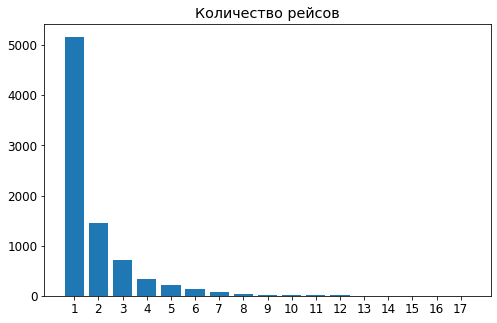

In [31]:
def display_distribution(unique_labels, labels_counts):
    plt.figure(figsize=(8,5))

    plt.bar(unique, counts)

    #plt.xlabel('Количество Рейсов')
    plt.xticks(unique)
    #plt.ylabel('Всего рейсов')
    plt.title('Количество рейсов')
    plt.show()

unique, counts = np.unique(df_target['Кол-во рейсов'], return_counts=True)
display_distribution(unique, counts)

Добавим возраст

In [32]:
df_target = df_target.merge(df_age[['ФИО', 'Возраст']], left_on='Физическое лицо', right_on='ФИО')
df_target = df_target.drop(columns=['ФИО'])

Добавим Тип судна

In [33]:
df_target['Тип судна'] = ""

In [34]:
df_syda

,Название судна,Тип судна
0,ТРФ_Гармония ТР,траспортное
1,ТРФ_Комсомолия Калининграда ТР,траспортное
2,ТРФ_Озерск ТР,траспортное
3,ТРФ_Прогресс ТР,траспортное
4,ТРФ_Симфония ТР,траспортное
5,ЮМРФ_Всеволод Сибирцев КРКПБ,плавбаза
6,ЮМРФ_Залив Восток ПЗ,плавбаза
7,ЮМРФ_Капитан Ефремов ПЗ,плавбаза
8,НМ_Дмитрий Шевченко СТР,добывающее судно
9,НМ_Калиновка СТР,добывающее судно


In [35]:
for index, row in df_syda.iterrows():
    df_target.loc[df_target['Подразделение'] == row['Название судна'], ['Тип судна']] = row['Тип судна']

Перекодируем должность, в зависимости от типа должности выделим: производство, судовая команда, обслуживающий и командный состав

In [36]:
df_target['Тип должности'] = ""

In [37]:
for index, row in df_dolgnost.iterrows():
    df_target.loc[df_target['Должность'] == row['Должность'], ['Тип должности']] = row['Тип']

In [38]:
df_target['Тип должности'].value_counts()

Производство        3063
Судовая команда     1773
Командный состав    1357
Обслуживающий        298
                      18
Name: Тип должности, dtype: int64

In [39]:
df_target.loc[(df_target['Тип должности'] == '')]

,Физическое лицо,Подразделение,Должность,Причина увольнения,Пол,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,Возраст,Тип судна,Тип должности
202,Антипов Андрей Борисович,НМ_Дмитрий Шевченко СТР,Вахтенный помощник,(НЕ ИСПОЛЬЗОВАТЬ) По собственному желанию А,мужской,2012-04-12,2019-11-13,2019-12-13,138.0,30,5,63,добывающее судно,
354,Байрамов Владислав Артурович,ТРФ_Прогресс ТР,Матрос-практикант,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2018-07-16,2018-07-16,2018-10-18,0.0,94,1,25,траспортное,
617,Бойко Роман Викторович,ЮМРФ_Залив Восток ПЗ,Дублер помощника капитана по производству,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2019-11-16,2020-11-01,2020-12-26,10.0,55,3,39,плавбаза,
718,Бровкина Евгения Николаевна,ЮМРФ_Капитан Ефремов ПЗ,Повар 3 разряда,"Истечение срока трудового договора, п2 ч1 ст77",женский,2015-11-11,2018-06-07,2018-07-13,286.0,36,3,44,плавбаза,
875,Васильев Юрий Алексеевич,ЮМРФ_Всеволод Сибирцев КРКПБ,Автоклавщик 1 класса,По состоянию здоровья (есть заключения врача),мужской,2014-01-12,2019-02-18,2020-03-27,94.0,403,6,60,плавбаза,
1154,Герцюк Сергей Дмитриевич,ЮМРФ_Всеволод Сибирцев КРКПБ,Третий механик ТО,Нарушение ст 216 Устава рыбопромыслового флота,мужской,2014-03-16,2014-03-16,2014-06-21,0.0,97,1,55,плавбаза,
1344,Гриханов Игорь Геннадьевич,ЮМРФ_Всеволод Сибирцев КРКПБ,Врач-хирург,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2014-02-26,2014-02-26,2015-04-30,0.0,428,1,56,плавбаза,
1435,Давыдов Денис Сергеевич,ТРФ_Прогресс ТР,Матрос-практикант,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2018-07-16,2019-07-07,2020-01-25,79.0,202,2,22,траспортное,
3169,Лобачев Евгений Иванович,НМ_Калиновка СТР,Вахтенный помощник,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2012-04-11,2015-07-01,2015-10-07,33.0,98,3,51,добывающее судно,
4128,Пакиш Михаил Антонович,ЮМРФ_Всеволод Сибирцев КРКПБ,Матрос 1 класса (крановщик),"Истечение срока трудового договора, п2 ч1 ст77",мужской,2014-02-26,2018-01-07,2017-10-15,42.0,-84,2,62,плавбаза,


Поработаем с причинами увольнения. Перекодируем в пассивные, активные и нейтральные

In [40]:
df_target['Тип причины увольнения'] = ""

In [41]:
for index, row in df_prichina_uvol.iterrows():
    df_target.loc[df_target['Причина увольнения'] == row['Причина увольнения'], ['Тип причины увольнения']] = row['Вид']

Добавим ФО

In [42]:
df_target = df_target.merge(df_city[['ФИО', 'ФО', 'столица субъекта']], left_on='Физическое лицо', right_on='ФИО')
df_target = df_target.drop(columns=['ФИО'])

In [43]:
df_target = df_target.drop(df_target[(df_target['столица субъекта'].isna())].index)

In [44]:
df_target.head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Пол,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,Возраст,Тип судна,Тип должности,Тип причины увольнения,ФО,столица субъекта
0,Ёркина Виктория Александровна,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",женский,2020-03-27,2020-03-27,2020-09-10,0.0,167,1,48,плавбаза,Производство,нейтральная,ДВФО,город
1,АЛИ ИМРОН,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2016-05-30,2016-05-30,2017-04-17,0.0,322,1,36,плавбаза,Производство,нейтральная,Индонезия,город
2,Абаев Дмитрий Анатольевич,ЮМРФ_Залив Восток ПЗ,Матрос-обработчик,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2015-06-22,2015-06-22,2015-08-26,0.0,65,1,25,плавбаза,Производство,нейтральная,ДВФО,населенный пункт


Посмотрим результат

In [45]:
df_target[df_target['Физическое лицо'].str.match('Храмец')]

,Физическое лицо,Подразделение,Должность,Причина увольнения,Пол,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,Возраст,Тип судна,Тип должности,Тип причины увольнения,ФО,столица субъекта
5891,Храмец Андрей Владимирович,ТРФ_Симфония ТР,Матрос 1 класса,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2017-07-25,2019-02-08,2019-03-05,128.0,25,3,38,траспортное,Судовая команда,нейтральная,ДВФО,населенный пункт


In [46]:
df_target.head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Пол,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,Возраст,Тип судна,Тип должности,Тип причины увольнения,ФО,столица субъекта
0,Ёркина Виктория Александровна,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",женский,2020-03-27,2020-03-27,2020-09-10,0.0,167,1,48,плавбаза,Производство,нейтральная,ДВФО,город
1,АЛИ ИМРОН,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2016-05-30,2016-05-30,2017-04-17,0.0,322,1,36,плавбаза,Производство,нейтральная,Индонезия,город
2,Абаев Дмитрий Анатольевич,ЮМРФ_Залив Восток ПЗ,Матрос-обработчик,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2015-06-22,2015-06-22,2015-08-26,0.0,65,1,25,плавбаза,Производство,нейтральная,ДВФО,населенный пункт


<H4> Создадим целевую переменную на основе количества рейсов

In [47]:
df_target['Кол-во рейсов'].value_counts()

1     4058
2     1118
3      541
4      250
5      172
6       95
7       65
8       28
9       15
10      11
11       7
12       6
13       2
14       2
17       1
16       1
15       1
Name: Кол-во рейсов, dtype: int64

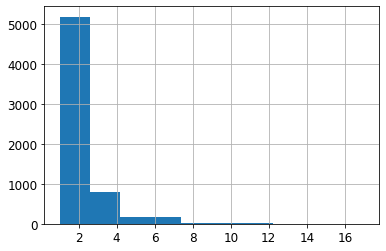

In [48]:
df_target['Кол-во рейсов'].hist();

В целевой переменной используем следующие обозначения <br>
1 - работник возвращается хотя бы раз <br>
0 - работник не возвращается

In [49]:
df_target['Target'] = 0
df_target.loc[(df_target['Кол-во рейсов'] > 1), 'Target'] = 1
df_target.loc[(df_target['Target'] == 1)]

,Физическое лицо,Подразделение,Должность,Причина увольнения,Пол,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,Возраст,Тип судна,Тип должности,Тип причины увольнения,ФО,столица субъекта,Target
8,Абдразаков Сергей Митхатович,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,Сокращение должности,мужской,2018-10-01,2020-03-27,2020-09-10,33.0,167,4,36,плавбаза,Производство,нейтральная,ДВФО,город,1
9,Абдрахманов Игорь Николаевич,ТРФ_Гармония ТР,Четвертый механик,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2018-01-27,2018-06-18,2018-08-10,10.5,53,2,52,траспортное,Командный состав,нейтральная,ДВФО,город,1
10,Абдрахманов Ришат Рашидович,НМ_Стерлядь СТР,Четвертый механик,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2016-06-06,2020-06-05,2021-05-17,193.0,346,3,28,добывающее судно,Командный состав,нейтральная,ЮФО,город,1
11,Абдрашитова Татьяна Витальевна,ЮМРФ_Всеволод Сибирцев КРКПБ,Матрос службы обработки рыбы,Не выдержал темпа работы,мужской,2017-11-26,2019-02-04,2019-06-11,98.0,127,3,44,плавбаза,Производство,активная,ДВФО,город,1
13,Абдул Мучит,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",мужской,2018-04-06,2019-08-26,2020-03-17,97.0,204,2,35,плавбаза,Производство,нейтральная,Индонезия,город,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,Яровенко Валентин Викторович,ПРФ_Таймень РС,Матрос 1 класса,В связи с вызовом на учебу,мужской,2019-05-28,2019-12-01,2020-05-29,15.0,180,2,31,добывающее судно,Судовая команда,нейтральная,ДВФО,город,1
6493,Яськов Сергей Алексеевич,НМ_Кострома СТР,Матрос 1 класса,Списание (увольнение) по медицинским показаниям А,мужской,2019-12-10,2020-01-17,2020-04-03,2.0,77,2,27,,Судовая команда,нейтральная,ДВФО,населенный пункт,1
6498,Яцкин Олег Вячеславович,ЮМРФ_Капитан Ефремов ПЗ,Матрос-обработчик,(НЕ ИСПОЛЬЗОВАТЬ) По собственному желанию А,мужской,2012-02-19,2012-07-10,2013-04-21,45.5,285,2,44,плавбаза,Производство,активная,ДВФО,город,1
6499,Яцура Владимир Михайлович,ЮМРФ_Капитан Ефремов ПЗ,Электрик,(НЕ ИСПОЛЬЗОВАТЬ) По собственному желанию А,мужской,2011-08-27,2012-09-13,2012-09-15,33.0,2,2,64,плавбаза,Производство,активная,ДВФО,город,1


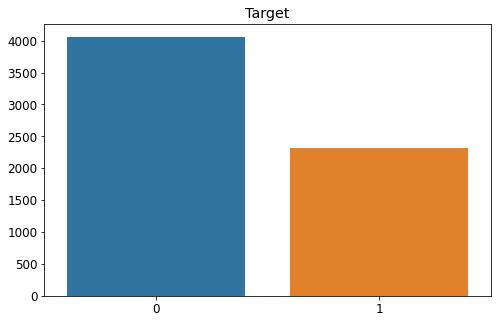

In [50]:
counts = df_target['Target'].value_counts()
    
plt.figure(figsize=(8,5))    
plt.title('Target')
sns.barplot(counts.index, counts.values)
    
plt.show()

In [51]:
df_target['Target'].value_counts()

0    4058
1    2315
Name: Target, dtype: int64

<H4> Обработаем категориальне признаки и создадим дами переменные

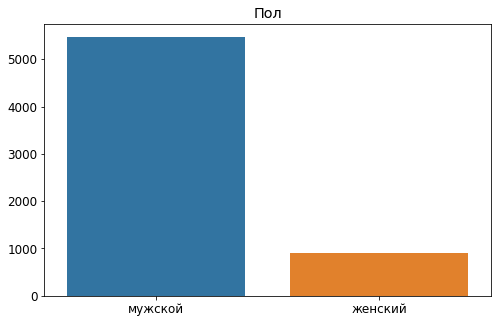

In [52]:
counts = df_target['Пол'].value_counts()
    
plt.figure(figsize=(8,5))    
plt.title('Пол')
sns.barplot(counts.index, counts.values)
    
plt.show()

In [53]:
df_target = pd.concat([df_target, pd.get_dummies(df_target['Пол'])], axis=1)
df_target = df_target.drop(columns=['Пол'])
df_target.head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,Возраст,Тип судна,Тип должности,Тип причины увольнения,ФО,столица субъекта,Target,женский,мужской
0,Ёркина Виктория Александровна,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2020-03-27,2020-03-27,2020-09-10,0.0,167,1,48,плавбаза,Производство,нейтральная,ДВФО,город,0,1,0
1,АЛИ ИМРОН,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2016-05-30,2016-05-30,2017-04-17,0.0,322,1,36,плавбаза,Производство,нейтральная,Индонезия,город,0,0,1
2,Абаев Дмитрий Анатольевич,ЮМРФ_Залив Восток ПЗ,Матрос-обработчик,"Истечение срока трудового договора, п2 ч1 ст77",2015-06-22,2015-06-22,2015-08-26,0.0,65,1,25,плавбаза,Производство,нейтральная,ДВФО,населенный пункт,0,0,1


In [54]:
df_target = df_target.drop(df_target[(df_target["Тип судна"] == '')].index)

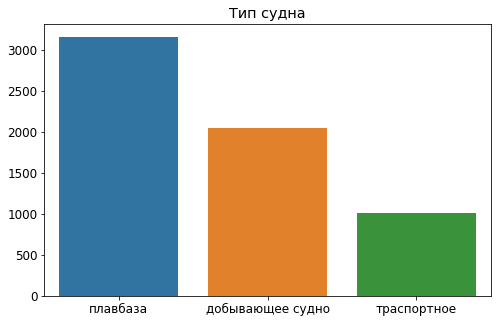

In [55]:
counts = df_target['Тип судна'].value_counts()
    
plt.figure(figsize=(8,5))    
plt.title('Тип судна')
sns.barplot(counts.index, counts.values)
    
plt.show()

In [56]:
df_target = pd.concat([df_target, pd.get_dummies(df_target['Тип судна'])], axis=1)
df_target = df_target.drop(columns=['Тип судна'])
df_target.head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,...,Тип должности,Тип причины увольнения,ФО,столица субъекта,Target,женский,мужской,добывающее судно,плавбаза,траспортное
0,Ёркина Виктория Александровна,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2020-03-27,2020-03-27,2020-09-10,0.0,167,1,...,Производство,нейтральная,ДВФО,город,0,1,0,0,1,0
1,АЛИ ИМРОН,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2016-05-30,2016-05-30,2017-04-17,0.0,322,1,...,Производство,нейтральная,Индонезия,город,0,0,1,0,1,0
2,Абаев Дмитрий Анатольевич,ЮМРФ_Залив Восток ПЗ,Матрос-обработчик,"Истечение срока трудового договора, п2 ч1 ст77",2015-06-22,2015-06-22,2015-08-26,0.0,65,1,...,Производство,нейтральная,ДВФО,населенный пункт,0,0,1,0,1,0


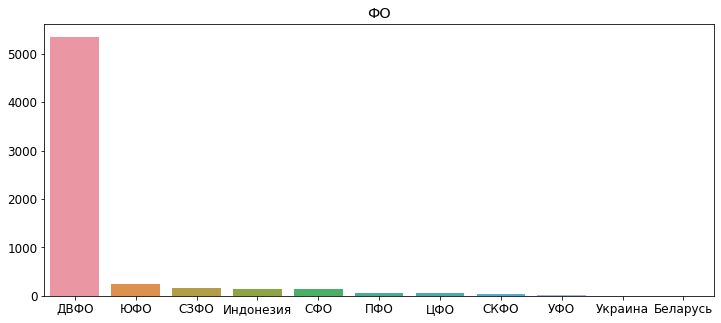

In [57]:
counts = df_target['ФО'].value_counts()
    
plt.figure(figsize=(12,5))    
plt.title('ФО')
sns.barplot(counts.index, counts.values)
    
plt.show()

In [58]:
df_target = pd.concat([df_target, pd.get_dummies(df_target['ФО'])], axis=1)
df_target = df_target.drop(columns=['ФО'])
df_target.head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,...,ДВФО,Индонезия,ПФО,СЗФО,СКФО,СФО,УФО,Украина,ЦФО,ЮФО
0,Ёркина Виктория Александровна,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2020-03-27,2020-03-27,2020-09-10,0.0,167,1,...,1,0,0,0,0,0,0,0,0,0
1,АЛИ ИМРОН,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2016-05-30,2016-05-30,2017-04-17,0.0,322,1,...,0,1,0,0,0,0,0,0,0,0
2,Абаев Дмитрий Анатольевич,ЮМРФ_Залив Восток ПЗ,Матрос-обработчик,"Истечение срока трудового договора, п2 ч1 ст77",2015-06-22,2015-06-22,2015-08-26,0.0,65,1,...,1,0,0,0,0,0,0,0,0,0


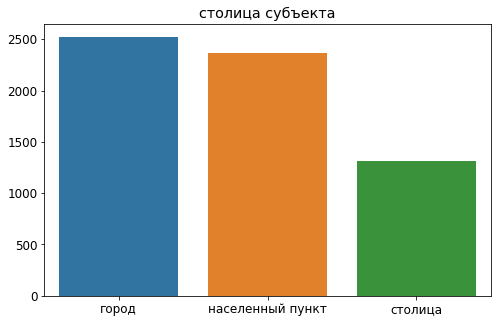

In [59]:
counts = df_target['столица субъекта'].value_counts()
    
plt.figure(figsize=(8,5))    
plt.title('столица субъекта')
sns.barplot(counts.index, counts.values)
    
plt.show()

In [60]:
df_target = pd.concat([df_target, pd.get_dummies(df_target['столица субъекта'])], axis=1)
df_target = df_target.drop(columns=['столица субъекта'])
df_target.head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,...,СЗФО,СКФО,СФО,УФО,Украина,ЦФО,ЮФО,город,населенный пункт,столица
0,Ёркина Виктория Александровна,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2020-03-27,2020-03-27,2020-09-10,0.0,167,1,...,0,0,0,0,0,0,0,1,0,0
1,АЛИ ИМРОН,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2016-05-30,2016-05-30,2017-04-17,0.0,322,1,...,0,0,0,0,0,0,0,1,0,0
2,Абаев Дмитрий Анатольевич,ЮМРФ_Залив Восток ПЗ,Матрос-обработчик,"Истечение срока трудового договора, п2 ч1 ст77",2015-06-22,2015-06-22,2015-08-26,0.0,65,1,...,0,0,0,0,0,0,0,0,1,0


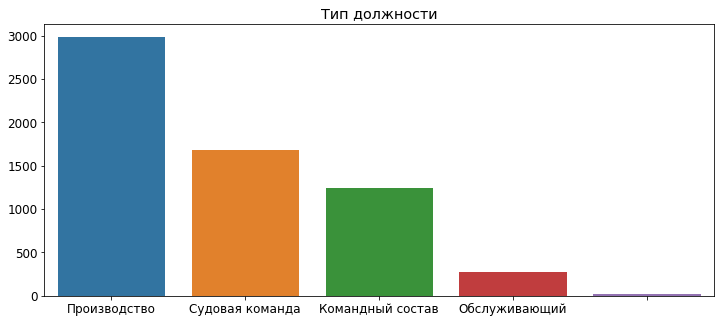

In [61]:
counts = df_target['Тип должности'].value_counts()
    
plt.figure(figsize=(12,5))    
plt.title('Тип должности')
sns.barplot(counts.index, counts.values)
    
plt.show()

In [62]:
#заполним пропуски причиной "нейтральная"
df_target.loc[(df_target['Тип должности'] == ''), 'Тип должности'] = 'Производство'

In [63]:
df_target = pd.concat([df_target, pd.get_dummies(df_target['Тип должности'])], axis=1)
df_target = df_target.drop(columns=['Тип должности'])
df_target.head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,...,Украина,ЦФО,ЮФО,город,населенный пункт,столица,Командный состав,Обслуживающий,Производство,Судовая команда
0,Ёркина Виктория Александровна,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2020-03-27,2020-03-27,2020-09-10,0.0,167,1,...,0,0,0,1,0,0,0,0,1,0
1,АЛИ ИМРОН,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2016-05-30,2016-05-30,2017-04-17,0.0,322,1,...,0,0,0,1,0,0,0,0,1,0
2,Абаев Дмитрий Анатольевич,ЮМРФ_Залив Восток ПЗ,Матрос-обработчик,"Истечение срока трудового договора, п2 ч1 ст77",2015-06-22,2015-06-22,2015-08-26,0.0,65,1,...,0,0,0,0,1,0,0,0,1,0


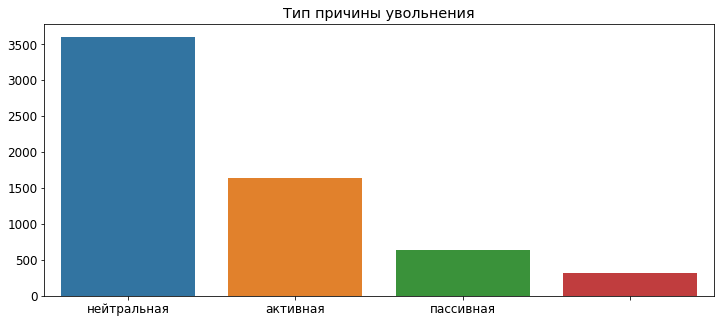

In [64]:
counts = df_target['Тип причины увольнения'].value_counts()
    
plt.figure(figsize=(12,5))    
plt.title('Тип причины увольнения')
sns.barplot(counts.index, counts.values)
    
plt.show()

In [65]:
#заполним пропуски причиной "нейтральная"
df_target.loc[(df_target['Тип причины увольнения'] == ''), 
              'Тип причины увольнения'] = 'нейтральная'

In [66]:
df_target = pd.concat([df_target, pd.get_dummies(df_target['Тип причины увольнения'])], axis=1)
df_target = df_target.drop(columns=['Тип причины увольнения'])
df_target.head(3)

,Физическое лицо,Подразделение,Должность,Причина увольнения,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,...,город,населенный пункт,столица,Командный состав,Обслуживающий,Производство,Судовая команда,активная,нейтральная,пассивная
0,Ёркина Виктория Александровна,ЮМРФ_Залив Восток ПЗ,Матрос 2 класса службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2020-03-27,2020-03-27,2020-09-10,0.0,167,1,...,1,0,0,0,0,1,0,0,1,0
1,АЛИ ИМРОН,ЮМРФ_Всеволод Сибирцев КРКПБ,Обработчик рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2016-05-30,2016-05-30,2017-04-17,0.0,322,1,...,1,0,0,0,0,1,0,0,1,0
2,Абаев Дмитрий Анатольевич,ЮМРФ_Залив Восток ПЗ,Матрос-обработчик,"Истечение срока трудового договора, п2 ч1 ст77",2015-06-22,2015-06-22,2015-08-26,0.0,65,1,...,0,1,0,0,0,1,0,0,1,0


Проверим людей, которые работали меньше 0

In [67]:
df_target.loc[df_target['Длительность последнего рейса'] < 0]

,Физическое лицо,Подразделение,Должность,Причина увольнения,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,...,город,населенный пункт,столица,Командный состав,Обслуживающий,Производство,Судовая команда,активная,нейтральная,пассивная
38,Аверин Юрий Геннадьевич,НМ_Седанка СТР,Мастер по добыче рыбы,"Отпуск, отгулы А",2014-07-07,2015-06-29,2015-05-15,21.0,-45,3,...,0,1,0,0,0,1,0,0,1,0
49,Агапов Роман Евгеньевич,НМ_Дмитрий Шевченко СТР,Второй помощник капитана,"Истечение срока трудового договора, п2 ч1 ст77",2016-05-20,2019-05-07,2017-10-22,281.0,-562,2,...,1,0,0,1,0,0,0,0,1,0
81,Акимов Александр Викторович,НМ_Седанка СТР,Помощник капитана по радиоэлектронике,"Истечение срока трудового договора, п2 ч1 ст77",2013-11-27,2020-03-04,2019-08-10,128.0,-207,4,...,0,0,1,1,0,0,0,0,1,0
167,Андреев Иван Геннадиевич,НМ_Калиновск СТР,Матрос 1 класса,(НЕ ИСПОЛЬЗОВАТЬ) По собственному желанию А,2010-04-24,2020-08-10,2020-07-23,161.0,-18,7,...,0,1,0,0,0,0,1,1,0,0
186,Аникин Павел Григорьевич,ЮМРФ_Всеволод Сибирцев КРКПБ,Второй механик ТО,Личные/семейные причины,2014-01-12,2018-03-28,2018-01-04,13.0,-83,5,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6324,Шнайдэр Сергей Андреевич,ТРФ_Гармония ТР,Моторист-токарь,"Истечение срока трудового договора, п2 ч1 ст77",2017-07-19,2020-10-08,2020-09-10,60.0,-28,4,...,0,1,0,0,0,0,1,0,1,0
6348,Шумилов Валерий Николаевич,ТРФ_Симфония ТР,Начальник радиостанции,"Истечение срока трудового договора, п2 ч1 ст77",2014-08-26,2020-09-30,2020-08-07,43.0,-54,6,...,0,0,1,1,0,0,0,0,1,0
6373,Щербаков Александр Юрьевич,НМ_Седанка СТР,Моторист 1 класса,"Истечение срока трудового договора, п2 ч1 ст77",2018-11-02,2019-11-11,2019-05-17,89.0,-178,2,...,1,0,0,0,0,0,1,0,1,0
6387,Щетин Сергей Анатольевич,НМ_Салма СТР,Матрос 1 класса,NaN,2011-12-29,2020-11-20,2020-09-01,168.0,-80,7,...,0,1,0,0,0,0,1,0,1,0


In [68]:
df_target['Длительность последнего рейса'].median()

134.0

In [69]:
df_target.loc[(df_target['Длительность последнего рейса'] < 0), 'Длительность последнего рейса'] = df_target['Длительность последнего рейса'].median()

Проверяем, когда количество дней работы равно 0

In [70]:
df_target.loc[df_target['Длительность последнего рейса'] == 0]

,Физическое лицо,Подразделение,Должность,Причина увольнения,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,...,город,населенный пункт,столица,Командный состав,Обслуживающий,Производство,Судовая команда,активная,нейтральная,пассивная
215,Антонова Файруза Ниазовна,НМ_Дмитрий Шевченко СТР,Повар 1 категории,NaN,2018-05-05,2018-05-05,2018-05-05,0.0,0.0,1,...,1,0,0,0,1,0,0,0,1,0
247,Арсеньев Валерий Африканович,ПРФ_Таймень РС,Второй помощник капитана,NaN,2016-12-01,2016-12-01,2016-12-01,0.0,0.0,1,...,1,0,0,1,0,0,0,0,1,0
248,Арсеньев Григорий Валериевич,ПРФ_Таймень РС,Второй помощник капитана,NaN,2017-04-15,2017-04-15,2017-04-15,0.0,0.0,1,...,1,0,0,1,0,0,0,0,1,0
467,Безруков Леонид Алексеевич,НМ_Калиновск СТР,Матрос 1 класса,NaN,2020-11-27,2020-11-27,2020-11-27,0.0,0.0,1,...,0,1,0,0,0,0,1,0,1,0
629,Болдырев Евгений Евгеньевич,НМ_Калиновка СТР,Старший механик,NaN,2020-11-18,2020-11-18,2020-11-18,0.0,0.0,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,Шевченко Владимир Сергеевич,ЮМРФ_Всеволод Сибирцев КРКПБ,Матрос службы обработки рыбы,Не устраивает место работы А,2018-03-29,2018-03-29,2018-03-29,0.0,0.0,1,...,0,1,0,0,0,1,0,1,0,0
6229,Шевченко Иван Викторович,ЮМРФ_Всеволод Сибирцев КРКПБ,Машинист рефрижераторных установок,NaN,2020-03-20,2020-03-20,2020-03-20,0.0,0.0,1,...,0,0,1,0,0,1,0,0,1,0
6320,Шмаюн Виктор Николаевич,ЮМРФ_Залив Восток ПЗ,Матрос 1 класса,NaN,2020-12-23,2020-12-23,2020-12-23,0.0,0.0,1,...,0,1,0,0,0,0,1,0,1,0
6344,Шульц Антон Валерьевич,ЮМРФ_Всеволод Сибирцев КРКПБ,Матрос службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2015-07-25,2017-11-30,2017-11-30,294.0,0.0,3,...,0,0,1,0,0,1,0,0,1,0


In [71]:
df_target = df_target.drop(df_target[(df_target["Длительность последнего рейса"] == 0)].index)

<H3> Посмотрим корреляционную матрицу

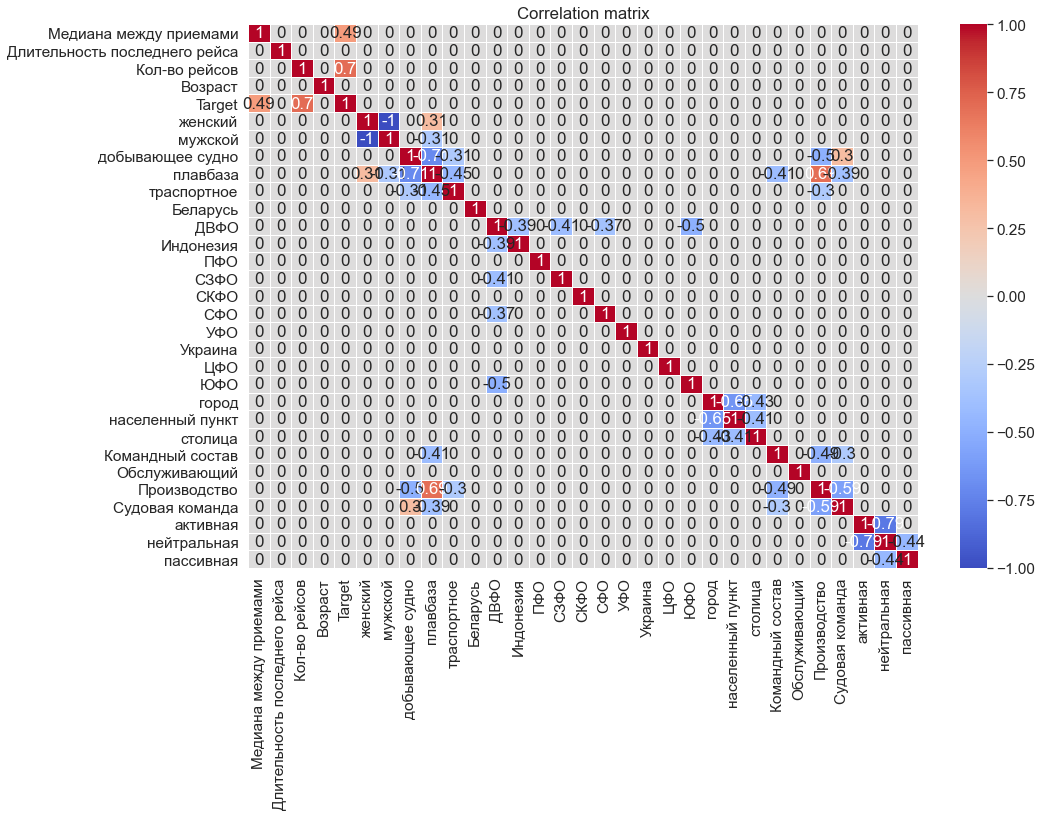

In [72]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_target.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [73]:
df_target['Target'].value_counts()

0    3872
1    2252
Name: Target, dtype: int64

**Сохранение результатов**

In [74]:
PREPARED_DATASET_PATH = './prepared.csv'
df_target.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

Я предлагаю убрать из кореляционной матрицы столбец *Количество рейсов*, так как на его основе строится целева переменная

In [75]:
list(df_target.columns.values)

['Физическое лицо',
 'Подразделение',
 'Должность',
 'Причина увольнения',
 'Первая дата приема',
 'Последняя дата приема',
 'Последняя дата увольнения',
 'Медиана между приемами',
 'Длительность последнего рейса',
 'Кол-во рейсов',
 'Возраст',
 'Target',
 'женский',
 'мужской',
 'добывающее судно',
 'плавбаза',
 'траспортное',
 'Беларусь',
 'ДВФО',
 'Индонезия',
 'ПФО',
 'СЗФО',
 'СКФО',
 'СФО',
 'УФО',
 'Украина',
 'ЦФО',
 'ЮФО',
 'город',
 'населенный пункт',
 'столица',
 'Командный состав',
 'Обслуживающий',
 'Производство',
 'Судовая команда',
 'активная',
 'нейтральная',
 'пассивная']

In [76]:
df = df_target[['Target', 'Длительность последнего рейса', 'Медиана между приемами', 'Возраст', 'женский', 
                'мужской', 'добывающее судно', 'плавбаза', 'траспортное', 'ДВФО', 'город', 'населенный пункт', 'столица',
                 'Командный состав', 'Обслуживающий', 'Производство', 'Судовая команда', 'активная', 'нейтральная', 'пассивная']]

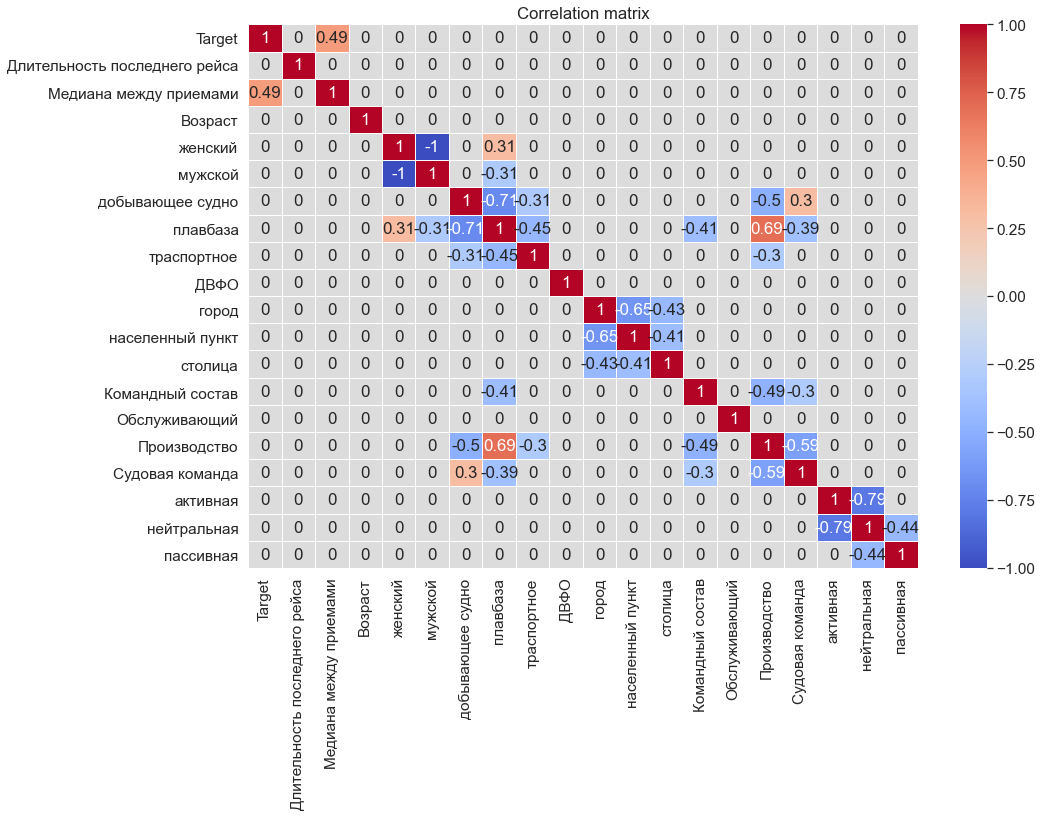

In [77]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

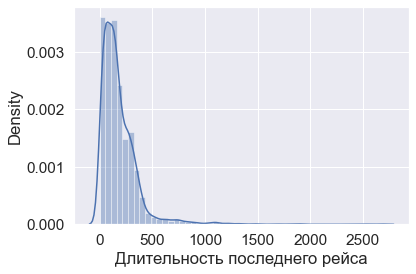

In [78]:
sns_plot = sns.distplot(df_target['Длительность последнего рейса'])
fig = sns_plot.get_figure()

In [80]:
df_target.loc[df_target['Длительность последнего рейса'] > 1000]

,Физическое лицо,Подразделение,Должность,Причина увольнения,Первая дата приема,Последняя дата приема,Последняя дата увольнения,Медиана между приемами,Длительность последнего рейса,Кол-во рейсов,...,город,населенный пункт,столица,Командный состав,Обслуживающий,Производство,Судовая команда,активная,нейтральная,пассивная
196,Аносов Игорь Михайлович,НМ_Стерлядь СТР,Матрос 2 класса,"Истечение срока трудового договора, п2 ч1 ст77",2016-12-23,2016-12-23,2019-11-08,0.0,1050.0,1,...,1,0,0,0,0,0,1,0,1,0
208,Антонов Александр Владимирович,ЮМРФ_Всеволод Сибирцев КРКПБ,Моторист 2 класса,"Истечение срока трудового договора, п2 ч1 ст77",2014-01-26,2014-01-26,2018-02-26,0.0,1492.0,1,...,0,1,0,0,0,0,1,0,1,0
214,Антонова Ирина Юрьевна,ЮМРФ_Всеволод Сибирцев КРКПБ,Официант,"Истечение срока трудового договора, п2 ч1 ст77",2014-07-14,2014-07-14,2018-02-17,0.0,1314.0,1,...,1,0,0,0,1,0,0,0,1,0
308,Ашанин Дмитрий Викторович,НМ_Салма СТР,Машинист рефрижераторных установок,"Истечение срока трудового договора, п2 ч1 ст77",2011-01-25,2011-01-25,2016-03-31,0.0,1892.0,1,...,0,1,0,0,0,1,0,0,1,0
311,Бабаева Галина Анатольевна,ЮМРФ_Всеволод Сибирцев КРКПБ,Матрос службы обработки рыбы,"Истечение срока трудового договора, п2 ч1 ст77",2014-07-15,2014-07-15,2021-05-03,0.0,2484.0,1,...,0,0,1,0,0,1,0,0,1,0
363,Бакунов Андрей Иванович,НМ_Ноглики СТР,Старший механик,NaN,2011-12-13,2014-04-01,2017-01-27,1.0,1032.0,2,...,1,0,0,1,0,0,0,0,1,0
456,Бегунов Игорь Александрович,ЮМРФ_Залив Восток ПЗ,Электрик судовой 1 класса,"Истечение срока трудового договора, п2 ч1 ст77",2014-02-13,2016-02-01,2021-01-04,31.0,1799.0,2,...,1,0,0,0,0,0,1,0,1,0
530,Бердиус Владимир Александрович,ЮМРФ_Всеволод Сибирцев КРКПБ,Моторист (машинист) трюмный 1 класса,"Истечение срока трудового договора, п2 ч1 ст77",2015-04-28,2015-04-28,2018-03-04,0.0,1041.0,1,...,0,1,0,0,0,0,1,0,1,0
1085,Галако Сергей Михайлович,НМ_Пластун СТР,Помощник капитана по радиоэлектронике,"Истечение срока трудового договора, п2 ч1 ст77",2015-05-05,2015-05-05,2019-04-09,0.0,1435.0,1,...,1,0,0,1,0,0,0,0,1,0
1275,Гордиенко Дмитрий Владимирович,ЮМРФ_Всеволод Сибирцев КРКПБ,Третий механик-наладчик,"Истечение срока трудового договора, п2 ч1 ст77",2017-09-11,2017-09-11,2021-04-23,0.0,1320.0,1,...,1,0,0,0,0,1,0,0,1,0
